In [122]:
import numpy as np
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings

from scipy.interpolate import interp1d

In [123]:
warnings.filterwarnings('ignore')

In [124]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Model\\Data')
data_all = pd.read_csv('Data_combined.csv', index_col = 0)

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\src\\data_preprocessing\\tsdm\\')
mandal_boundaries = gpd.read_file('Mandal_Boundary.shp')
mandal_boundaries = mandal_boundaries.reset_index()

In [125]:
data = data_all[data_all['Month'].isin([4, 5, 9, 10])]

In [126]:
del data['geometry']
data = pd.merge(data, mandal_boundaries[['index', 'geometry']], how='left', on=['index'])

In [127]:
data['ModifiedDateTime'] = pd.to_datetime(data['ModifiedDateTime'])

In [128]:
data.columns

Index(['index', 'Mandal_Nam', 'Dist_Name', 'ModifiedDateTime', 'Year', 'Month',
       'Season', 'NO2', 'PM2.5', 'SSM_mean', 'SSM_median', 'SSM_min',
       'SSM_max', 'SSM_percentile_90', 'PRE_mean', 'PRE_median', 'PRE_min',
       'PRE_max', 'PRE_percentile_90', 'PRE_sum', 'POP_mean', 'POP_median',
       'ST_mean', 'ST_median', 'ST_min', 'ST_max', 'ST_percentile_90',
       'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max', 'RWI_percentile_90',
       'AOT_mean', 'AOT_median', 'AOT_min', 'AOT_max', 'AOT_percentile_90',
       'BA_mean', 'BA_median', 'BA_sum', 'Area_Crops', 'Area_Trees',
       'Area_Built_Area', 'time_to_rur_median', 'PowP_score', 'Soil Type',
       'CropA_Paddy', 'CropA_Maize', 'CropA_Soybean', 'CropA_Cotton',
       'CropA_Chillies', 'CropA_Turmeric', 'SoilT_Chromic_Luvisols',
       'SoilT_Chromic_Vertisols', 'SoilT_Eutric_Nitosols', 'SoilT_Lithosols',
       'SoilT_Pellic_luvisols', 'SoilT_Plinthic_Luvisols',
       'SoilT_Vertic_Cambisols', 'geometry'],
      dty

In [129]:
units = ['SSM_mean', 'SSM_median', 'SSM_min',
       'SSM_max', 'SSM_percentile_90', 'PRE_mean', 'PRE_median', 'PRE_min',
       'PRE_max', 'PRE_percentile_90', 'PRE_sum', 'POP_mean', 'POP_median',
       'ST_mean', 'ST_median', 'ST_min', 'ST_max', 'ST_percentile_90',
       'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max', 'RWI_percentile_90',
       'AOT_mean', 'AOT_median', 'AOT_min', 'AOT_max', 'AOT_percentile_90',
       'BA_mean', 'BA_median', 'BA_sum', 'Area_Crops', 'Area_Trees',
       'Area_Built_Area', 'time_to_rur_median', 'PowP_score', 'Soil Type',
       'CropA_Paddy', 'CropA_Maize', 'CropA_Soybean', 'CropA_Cotton',
       'CropA_Chillies', 'CropA_Turmeric', 'SoilT_Chromic_Luvisols',
       'SoilT_Chromic_Vertisols', 'SoilT_Eutric_Nitosols', 'SoilT_Lithosols',
       'SoilT_Pellic_luvisols', 'SoilT_Plinthic_Luvisols',
       'SoilT_Vertic_Cambisols']

for i in units:
    if data[i].isnull().sum()>0:
        print(i + ' has ' + str(data[i].isnull().sum()) + ' missing values.')

AOT_mean has 406 missing values.
AOT_median has 406 missing values.
AOT_min has 406 missing values.
AOT_max has 406 missing values.
AOT_percentile_90 has 406 missing values.
time_to_rur_median has 12 missing values.
CropA_Paddy has 646 missing values.
CropA_Maize has 646 missing values.
CropA_Soybean has 646 missing values.
CropA_Cotton has 646 missing values.
CropA_Chillies has 646 missing values.
CropA_Turmeric has 646 missing values.


## Dropping all mandals of which no one data type is available

In [130]:

# #Note that we do not have crop type values for all mandals, they have zero's during non-season but for complete picture we remove these mandals completely
# missing_mandal_crop_types = [13, 34, 37, 220, 265, 579, 584, 585, 586, 587, 588, 591] #Can be found in Date_pre_combiner.ipynb

# #No soil temperature for this mandal available
# #missing_mandal_ST = [79]

# #We also need to remove the non-seasonal mandals
# data = data[~data['index'].isin(missing_mandal_crop_types)]
# #data = data[~data['index'].isin(missing_mandal_ST)]

In [131]:
# units = ['SSM_mean', 'SSM_median', 'SSM_min',
#        'SSM_max', 'SSM_percentile_90', 'PRE_mean', 'PRE_median', 'PRE_min',
#        'PRE_max', 'PRE_percentile_90', 'PRE_sum', 'POP_mean', 'POP_median',
#        'ST_mean', 'ST_median', 'ST_min', 'ST_max', 'ST_percentile_90',
#        'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max', 'RWI_percentile_90',
#        'AOT_mean', 'AOT_median', 'AOT_min', 'AOT_max', 'AOT_percentile_90',
#        'BA_mean', 'BA_median', 'BA_sum', 'Crops', 'Trees', 'Built Area',
#        'time_to_rur_median', 'PowP_score', 'Soil Type', 'Paddy', 'Maize',
#        'Soybean', 'Cotton', 'Chillies', 'Turmeric', 'Chromic Luvisols',
#        'Chromic Vertisols', 'Eutric Nitosols', 'Lithosols', 'Pellic Luvisols',
#        'Plinthic Luvisols', 'Vertic Cambisols']

# for i in units:
#     if data[i].isnull().sum()>0:
#         print(i + ' has ' + str(data[i].isnull().sum()) + ' missing values.')

# Test Run all values 

In [132]:
parameters = ['index', 'Mandal_Nam', 'Dist_Name', 'ModifiedDateTime', 'Year', 'Month',
       'Season', 'NO2', 'PM2.5', 'SSM_mean', 'SSM_median', 'SSM_min',
       'SSM_max', 'SSM_percentile_90', 'PRE_mean', 'PRE_median', 'PRE_min',
       'PRE_max', 'PRE_percentile_90', 'PRE_sum', 'POP_mean', 'POP_median',
       'ST_mean', 'ST_median', 'ST_min', 'ST_max', 'ST_percentile_90',
       'RWI_mean', 'RWI_median', 'RWI_min', 'RWI_max', 'RWI_percentile_90',
 #      'AOT_mean', 'AOT_median', 'AOT_min', 'AOT_max', 'AOT_percentile_90',
       'BA_mean', 'BA_median', 'BA_sum', 'Area_Crops', 'Area_Trees',
       'Area_Built_Area', 'time_to_rur_median', 'PowP_score', 'Soil Type',
       'CropA_Paddy', 'CropA_Maize', 'CropA_Soybean', 'CropA_Cotton',
       'CropA_Chillies', 'CropA_Turmeric', 'SoilT_Chromic_Luvisols',
       'SoilT_Chromic_Vertisols', 'SoilT_Eutric_Nitosols', 'SoilT_Lithosols',
       'SoilT_Pellic_luvisols', 'SoilT_Plinthic_Luvisols',
       'SoilT_Vertic_Cambisols', 'geometry']

#First just drop all NaNs
data_final = data[parameters].dropna()
len(data_final)

6446

# Filling Missing Values of SSM and ST

Filling ST is possible linearly see plots:

In [70]:
# missing_STL_indexes = data[data['ST_lagged'].isnull()]['index'].unique()
# df_ST_missing = data[data['index'].isin(missing_STL_indexes)]

# data['test'] = data['ST_lagged'].interpolate(method = 'linear')

# #for index in missing_STL_indexes:
# #    df_mandal_ST_missing = df_ST_missing[df_ST_missing['index']==index]
# #    df_mandal_ST_missing['ST_lagged_filled'] = df_mandal_ST_missing['ST_lagged'].interpolate(method = 'linear')
# #    plt.plot(df_mandal_ST_missing['ModifiedDateTime'], df_mandal_ST_missing['ST_lagged'], color='red', marker='o')
# #    plt.plot(df_mandal_ST_missing['ModifiedDateTime'],  df_mandal_ST_missing['ST_lagged_filled'], color='blue', linestyle='--')
# #    plt.legend(['data', 'test'], loc='best')
# #    plt.xticks(rotation=45, ha='right')
# #    plt.ylabel('Soil Temperature (degrees Celcius)')
# #    plt.xlabel('Date')
# #    plt.title('Filling Missing Values Mandal ' + df_mandal_ST_missing['Mandal_Nam'].iloc[0])
# #    plt.show()



In [133]:
# for i in units:
#     print(i + ' has ' + str(data[i].isnull().sum()) + ' missing values.')

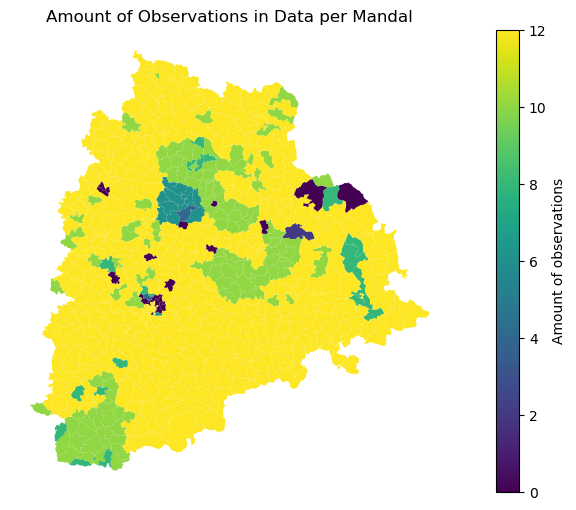

In [134]:
data_gr = data_final.groupby('index')['Year'].count().reset_index()
data_miss = pd.merge(data_gr, mandal_boundaries[['index', 'geometry']], on='index', how='right')
data_miss['Year'] = data_miss['Year'].fillna(0)

data_miss = gpd.GeoDataFrame(data_miss, geometry = data_miss.geometry, crs = {'init': 'epsg:4326'}) 

data_miss.plot(column = 'Year', legend=True, figsize = [12,6], legend_kwds = {'label': 'Amount of observations'}, )
plt.axis('off')
plt.title('Amount of Observations in Data per Mandal')
plt.show()

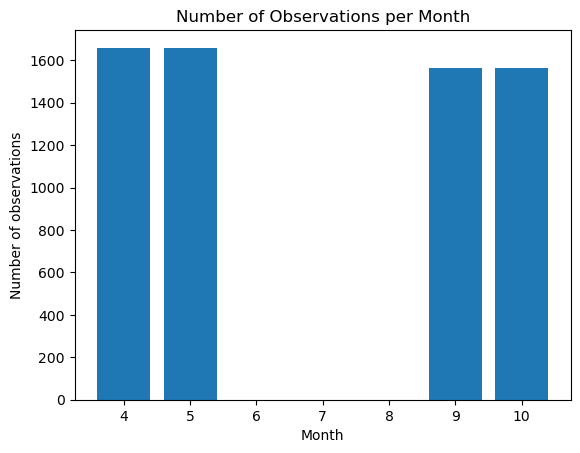

In [135]:
data_per_month = data_final.groupby('Month')['Year'].count().reset_index()

plt.bar(data_per_month['Month'], data_per_month['Year'])
plt.xlabel('Month')
plt.ylabel('Number of observations')
plt.title('Number of Observations per Month')
plt.show()

In [136]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\sandbox\\notebooks\\crop_fires\\Model\\Data')
print(len(data_final))
data_final.to_csv('Data_final.csv')

6446
